In [5]:
!nvidia-smi

Tue Apr 16 19:42:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0              N/A /  80W |      8MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

/home/dwidar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)
Setup complete ✅ (20 CPUs, 15.3 GB RAM, 89.4/97.9 GB disk)

OS                  Linux-6.5.0-27-generic-x86_64-with-glibc2.35
Environment         Linux
Python              3.10.12
Install             pip
RAM                 15.32 GB
CPU                 12th Gen Intel Core(TM) i7-12700H


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kjo7aNtqeeTbpsnA56ef")
project = rf.workspace("material-identification").project("garbage-classification-3")
version = project.version(1)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`


In [9]:
# i already did the training and saved the model weights
# 300 epochs is an overkill only the first 100 epochs made a difference
# it auto terminates after 200 epochs because the second 100 epochs did not make a difference
# if u need a to train something else just contact me if you don't have the computing power
# there is several architectures to choose from yolov8s, yolov8m, yolov8l
#Learn the difference between them


#!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=300 imgsz=416 

'=3.20.3,'
 GARBAGE-CLASSIFICATION-3-1/
 infer.ipynb
 runs/
 trainer.py
 train_yolov7_object_detection_on_custom_data.ipynb*
 tsst.jpeg
 yolov8l.pt
 yolov8m.pt
 yolov8n.pt


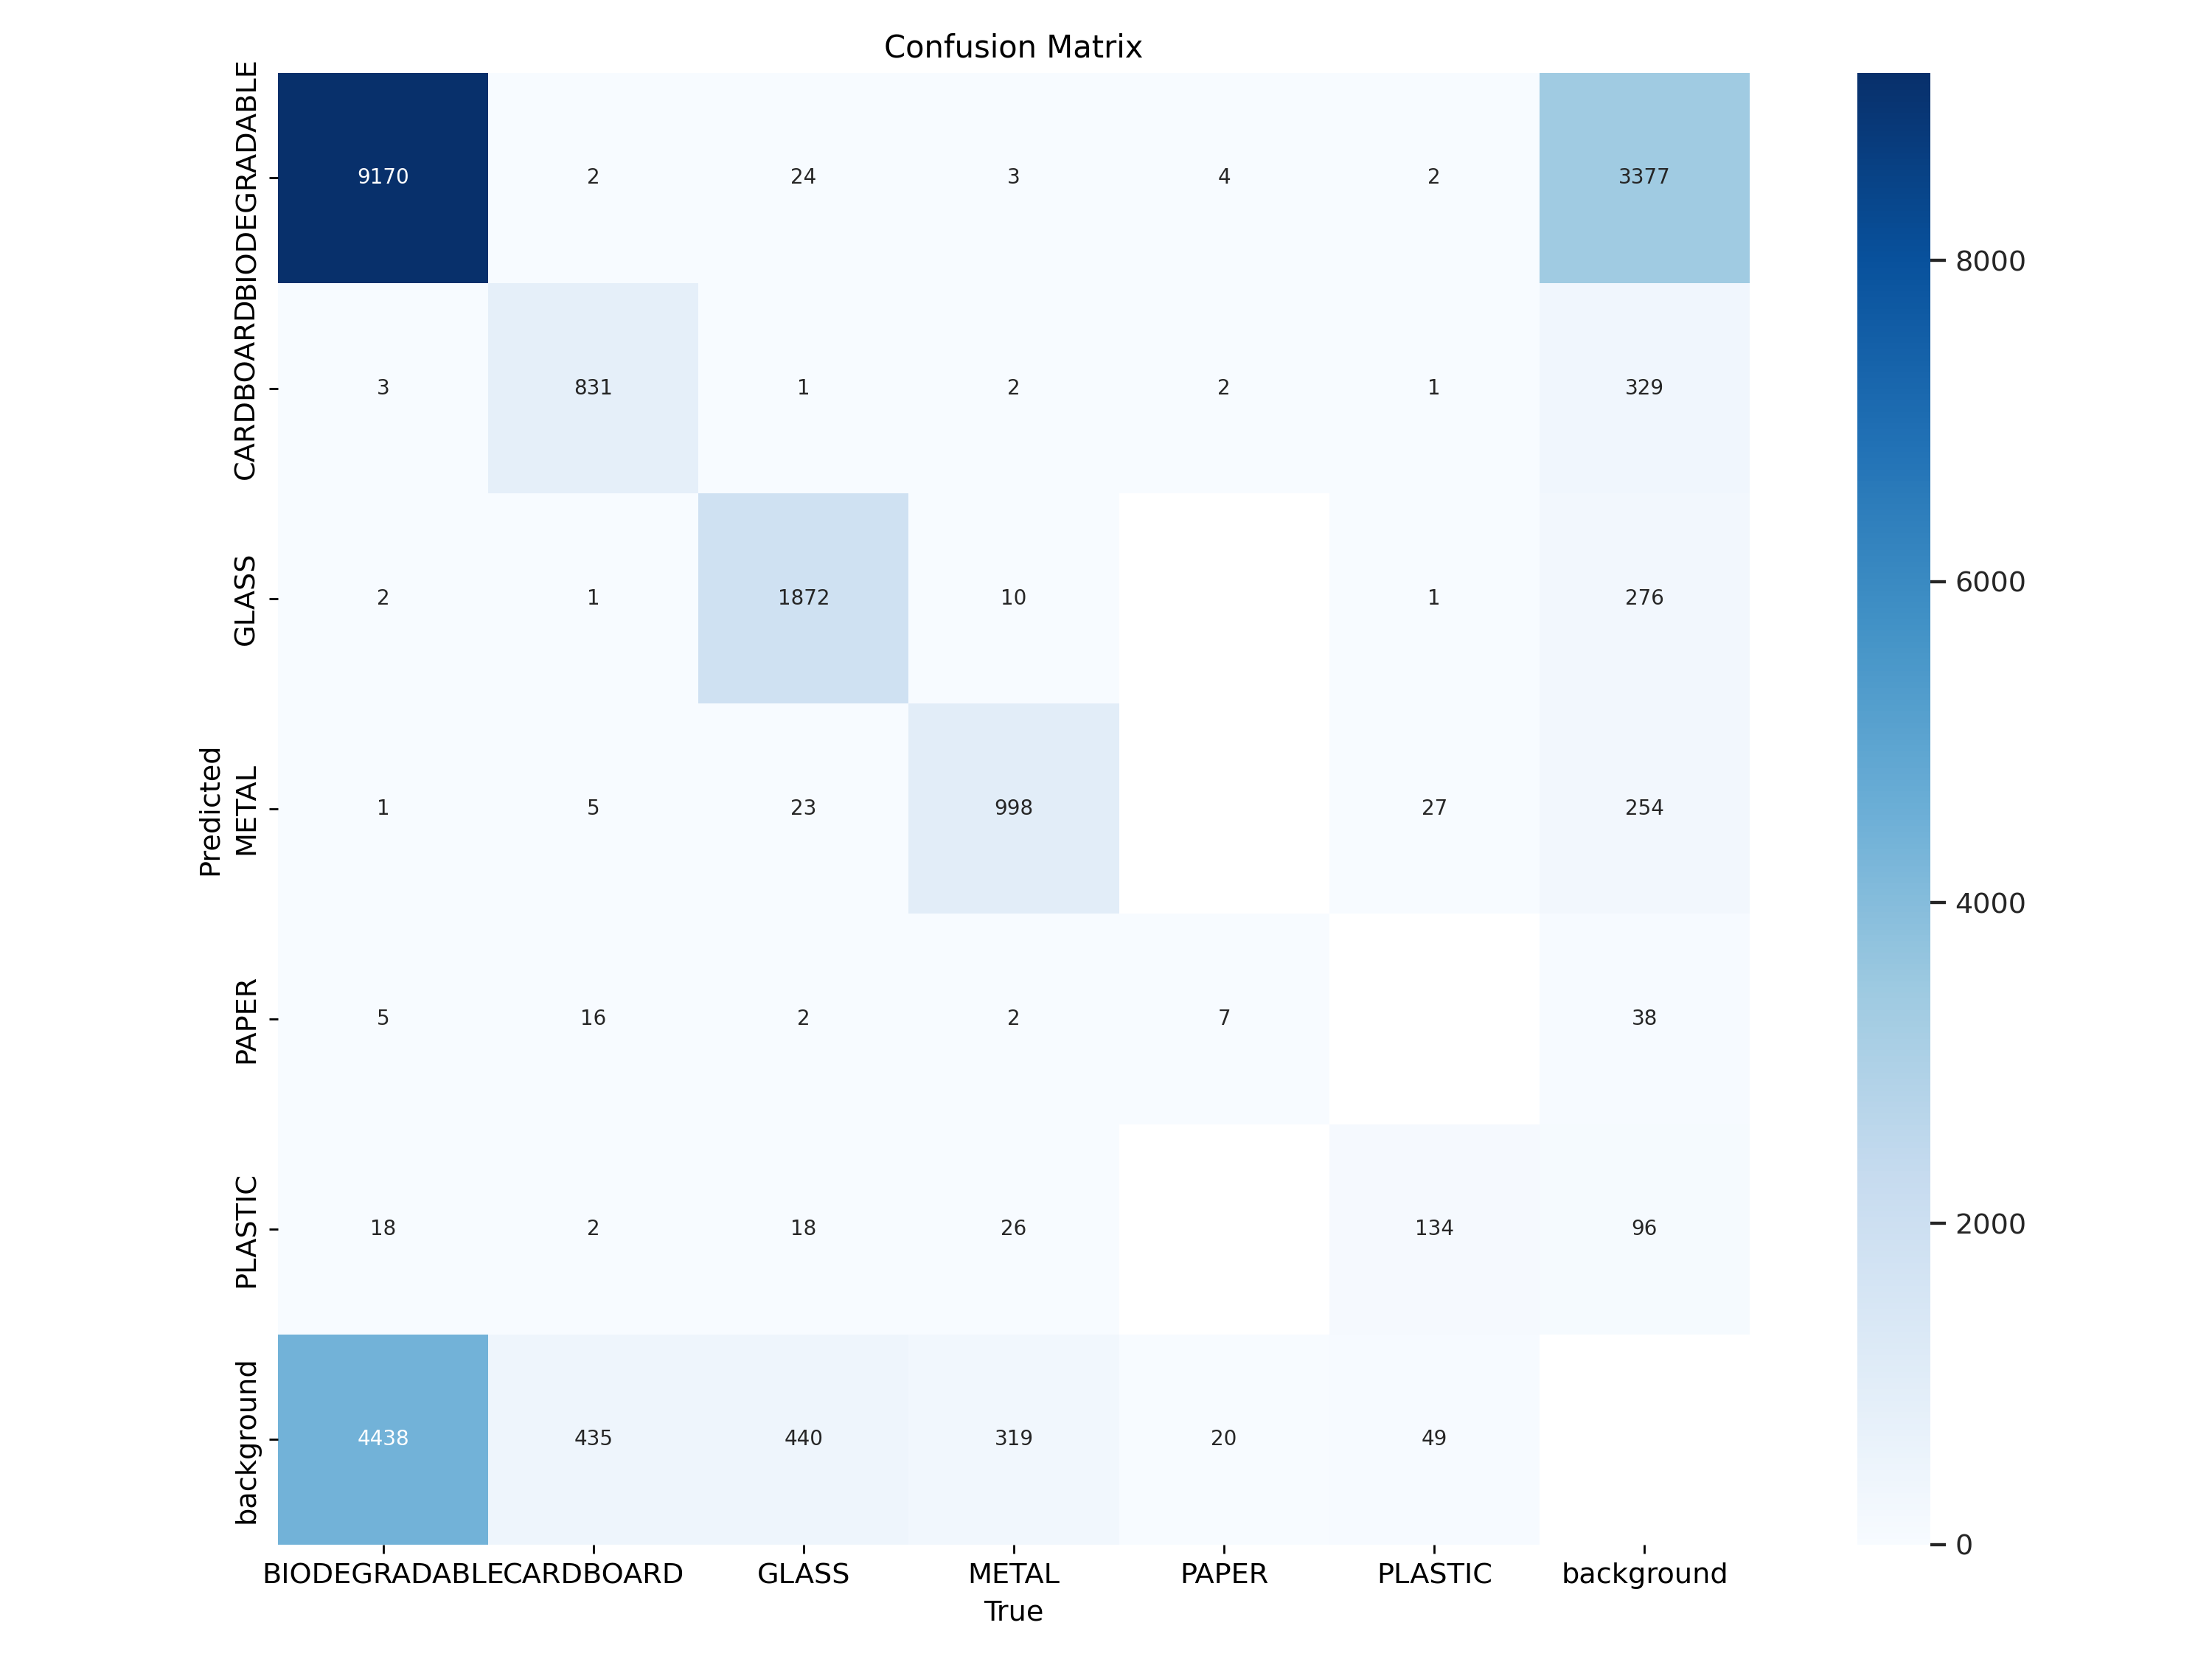

In [10]:
%ls
from IPython.display import display, Image
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

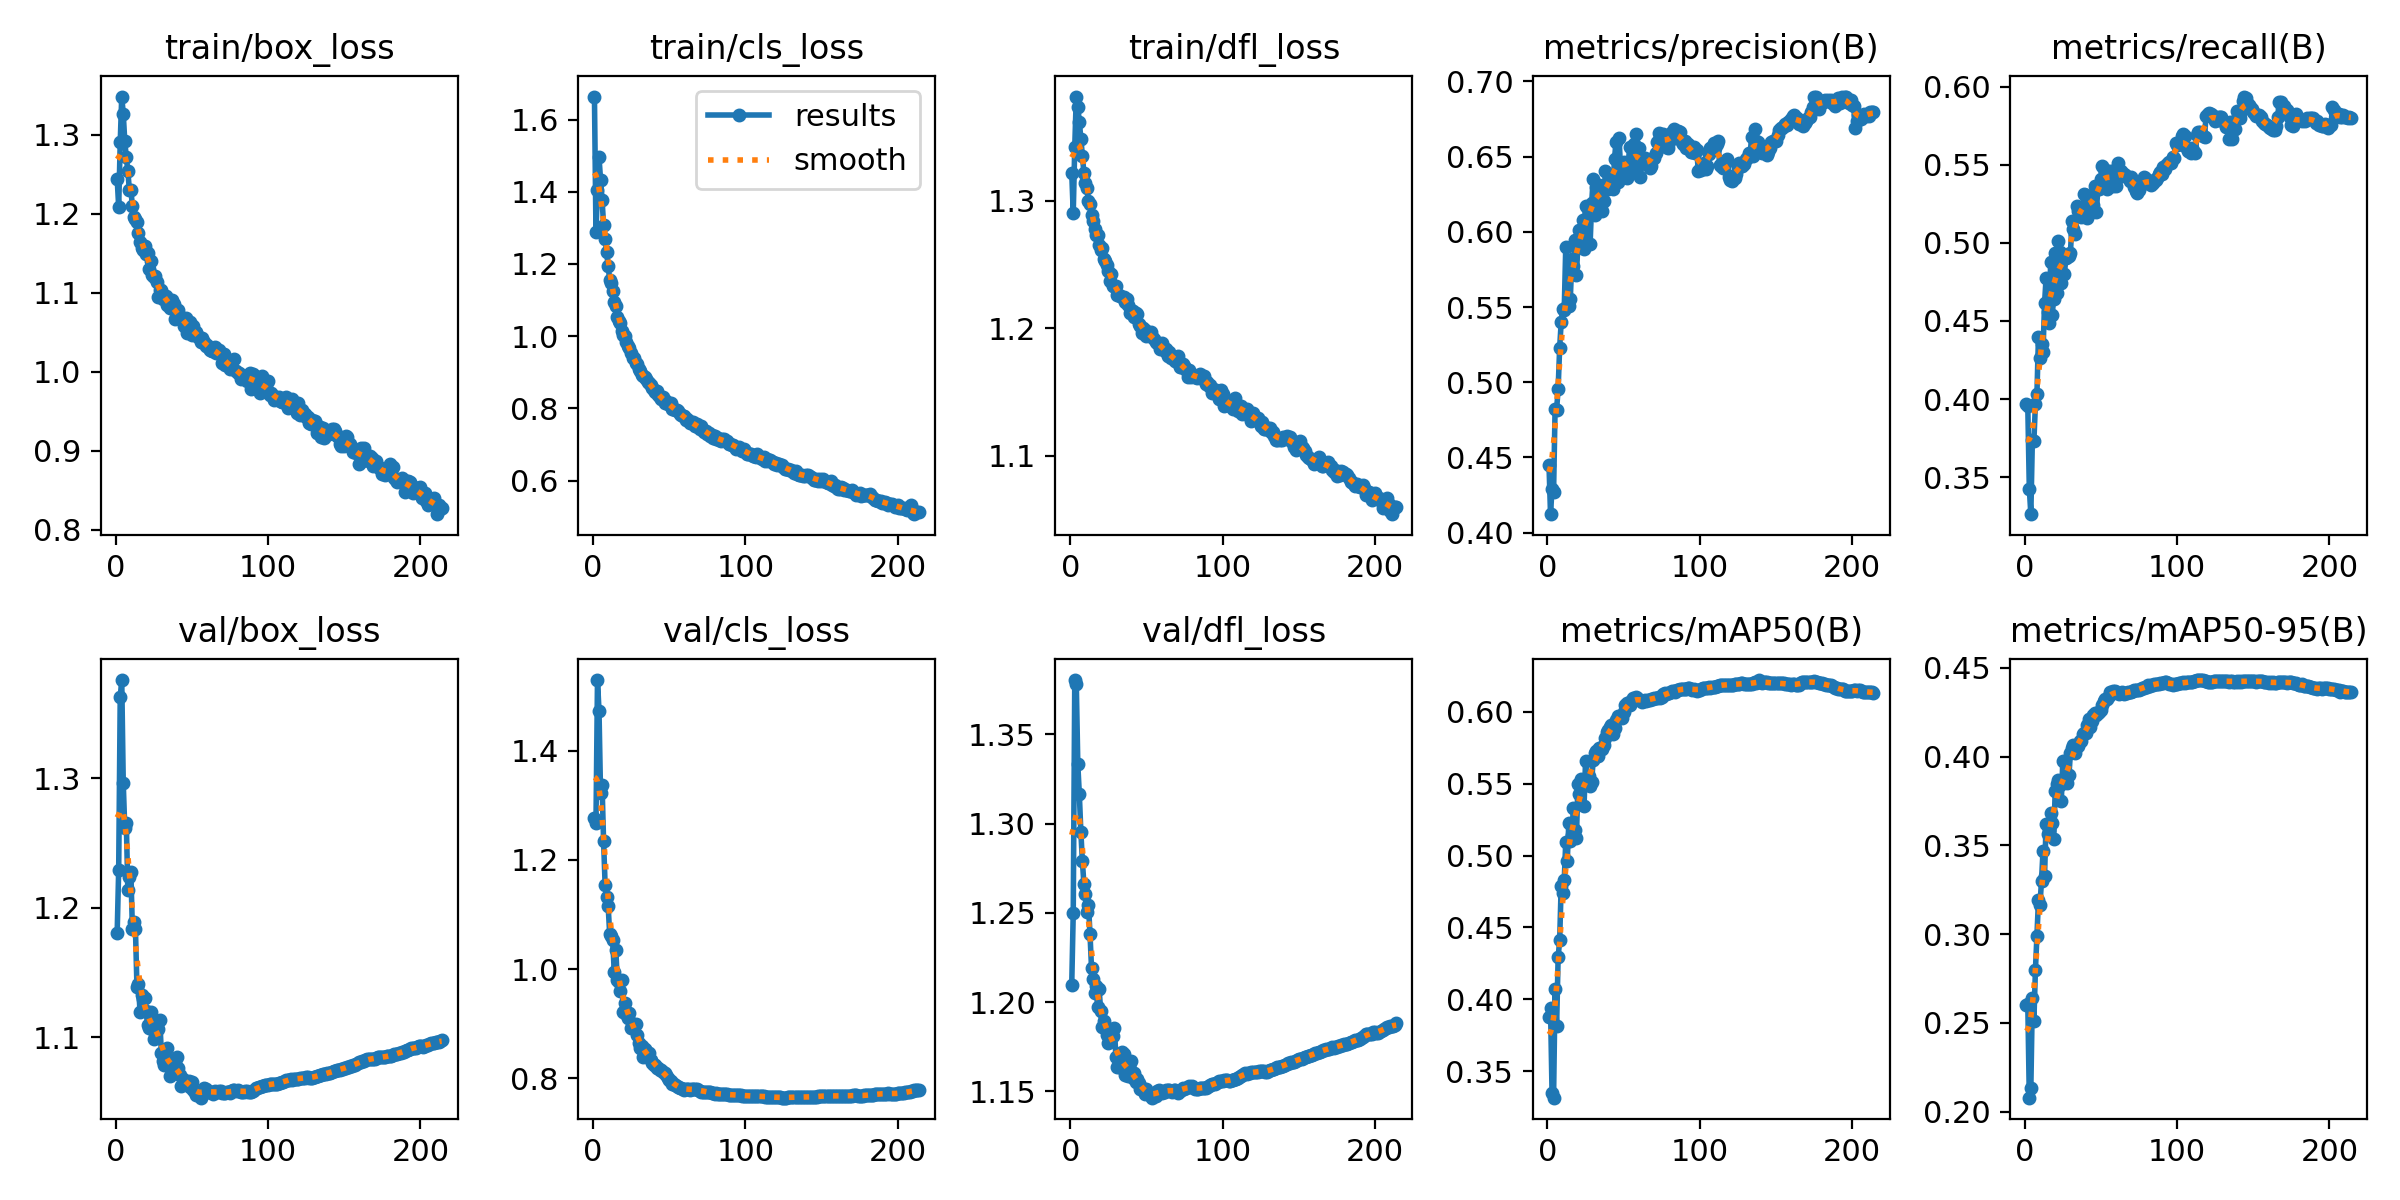

In [11]:
Image(filename='runs/detect/train/results.png', width=600)

In [12]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/dwidar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/dwidar/Desktop/projRepo/camNode/GARBAGE-CLASSIFICATION-3-1/v
val: New cache created: /home/dwidar/Desktop/projRepo/camNode/GARBAGE-CLASSIFICATION-3-1/valid/labels.cache
                

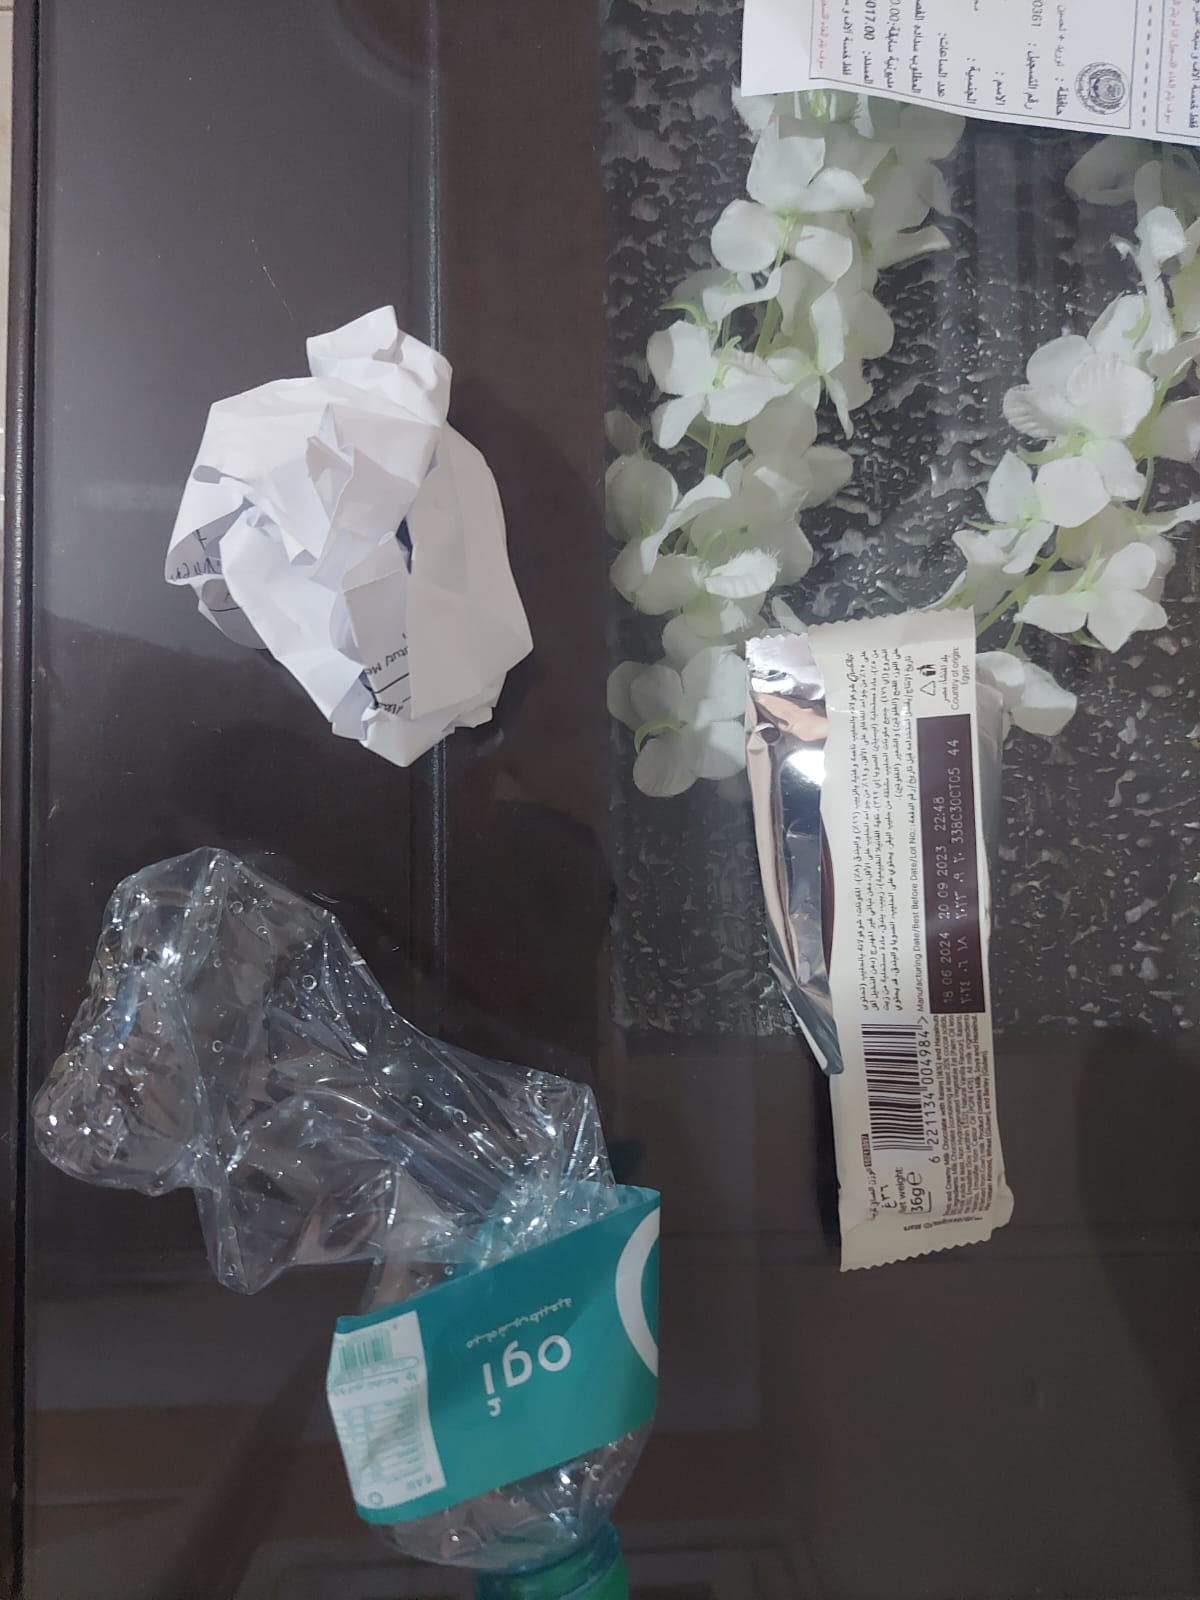

In [13]:
#this part is auto generated code i don't remember how it works regenerate it if u don't know too
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'tsst.jpeg'):
  display(Image(filename=image_path, height=600))
print("\n")

In [14]:
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO('runs/detect/train/weights/best.pt')
#weights_path = os.path.abspath('runs/detect/train/weights/best.pt')
#model = yolo.load(weights_path)
image_path = 'tsst.jpeg'
im = Image.open(image_path)

results = model.predict(source=im, save=True)  # save plotted images




0: 416x320 2 PAPERs, 3 PLASTICs, 224.9ms
Speed: 4.9ms preprocess, 224.9ms inference, 1720.8ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/predict9


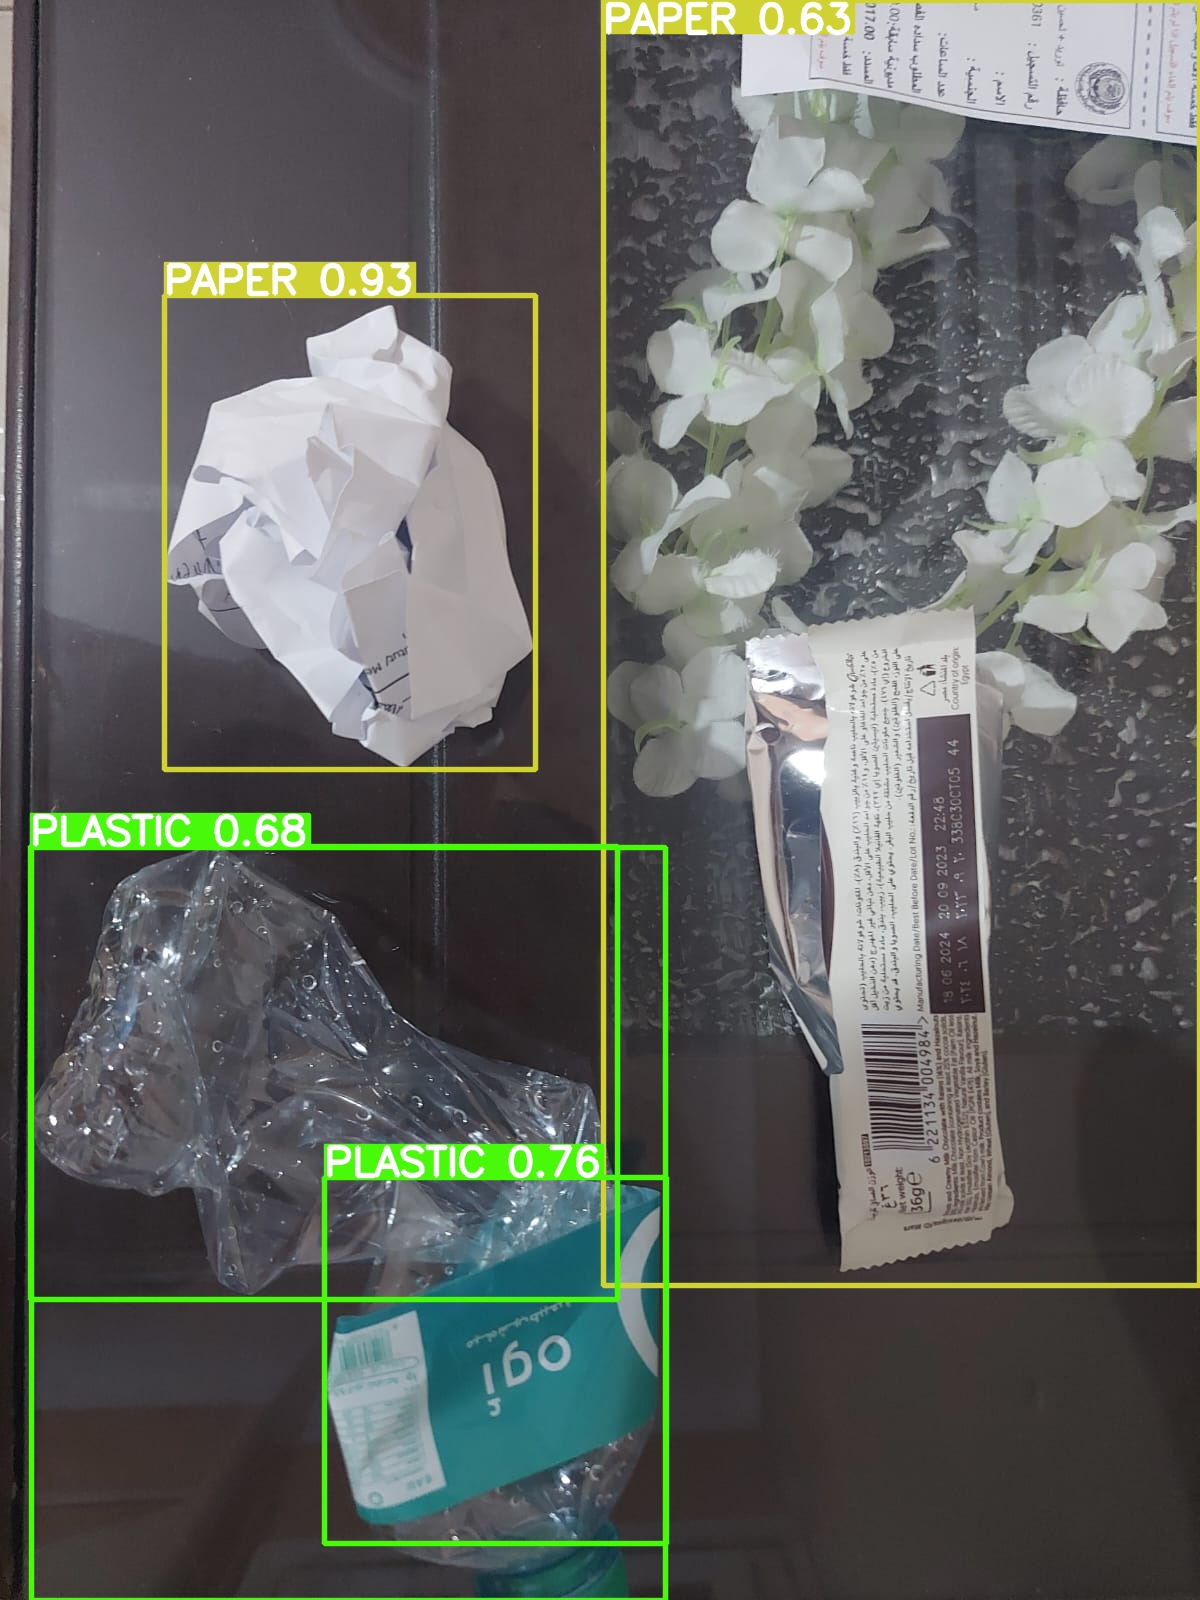

In [15]:
from IPython.display import display, Image
Image(filename='runs/detect/predict4/tsst.jpeg', width=600)